In [1]:
import pandas
# load the dataset
dataset = pandas.read_csv('textWithTag.csv')
del dataset['Unnamed: 0']
dataset.head()

,fileName,fileText,tags
0,43,Reverse Engineering of Biological Complexity M...,parsimony; 2002; robustness; systems biology; ...
1,44,insight review articles\n\nExploring complex n...,bistability; network; complex networks; networ...
2,47,insight review articles\n\nExploring complex n...,search; web graph; small world; navigation; mo...
3,99,letters to nature\ntypically slower than 1 km ...,bistability; clustering; network; network dyna...
4,101,Network Motifs: Simple Building Blocks of Comp...,protein protein; link analysis; web graph; 200...


In [2]:
# import sys
# print(sys.path)

In [3]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['fileText'].apply(lambda x: len(str(x).split(" ")))
dataset[['fileText','word_count']].head()

,fileText,word_count
0,Reverse Engineering of Biological Complexity M...,7557
1,insight review articles\n\nExploring complex n...,9262
2,insight review articles\n\nExploring complex n...,9262
3,letters to nature\ntypically slower than 1 km ...,3863
4,Network Motifs: Simple Building Blocks of Comp...,4767


In [4]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count      182.000000
mean      6896.543956
std       6510.682568
min        865.000000
25%       4361.500000
50%       5503.000000
75%       7249.000000
max      67220.000000
Name: word_count, dtype: float64

In [5]:
#Identify common words
freq = pandas.Series(' '.join(dataset['fileText']).split()).value_counts()[:20]
freq

the     55918
of      46278
and     30642
in      22942
to      20107
a       17894
for     11239
is      10699
that    10616
with     7976
The      7800
are      7725
by       7419
from     6057
as       5727
be       5479
on       5430
et       4282
or       3823
at       3739
dtype: int64

In [6]:
#Identify uncommon words
unFreq =  pandas.Series(' '.join(dataset 
         ['fileText']).split()).value_counts()[-20:]
unFreq

Dutta,                 1
Bourqui                1
2:661­                 1
receptor-expressing    1
416­427                1
Montmayeur10,          1
icance                 1
results97              1
Twodimensional         1
Bazan,                 1
architecture).         1
Xu70,                  1
tuff;                  1
233:271­309.           1
10,940                 1
nectivity              1
branches).             1
5.50                   1
fulvestrant,           1
(indicated).           1
dtype: int64

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

# word = "inversely"

# print("stemming:",stem.stem(word))
# print("lemmatization:", lem.lemmatize(word, "v"))

In [8]:
#Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [9]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "www", "http", "https"]
stop_words = stop_words.union(new_words)

In [10]:
corpus = []
for i in range(len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['fileText'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [11]:
#View corpus item
corpus[0]

'reverse engineering biological complexity marie e csete et al science doi science following resource related article available online sciencemag org information current may updated information service including high resolution figure found online version article sciencemag org cgi content full supporting online material found sciencemag org cgi content full dc article cite article accessed free sciencemag org cgi content full otherarticles article cited article isi web science article cited article hosted highwire press see sciencemag org cgi content full otherarticles article appears following subject collection cell biology sciencemag org cgi collection cell biol information obtaining reprint article obtaining permission reproduce article whole part found sciencemag org permission dtl science print issn online issn published weekly except last week december american association advancement science york avenue nw washington dc copyright american association advancement science right 

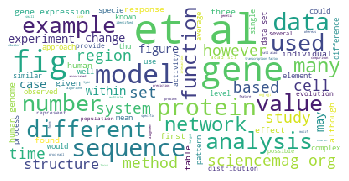

In [12]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [83]:
list(cv.vocabulary_.keys())[:10]

['reverse',
 'engineering',
 'biological',
 'complexity',
 'marie',
 'following',
 'resource',
 'article',
 'online',
 'sciencemag']

[Text(0, 0, 'gene'),
 Text(0, 0, 'genome'),
 Text(0, 0, 'sequence'),
 Text(0, 0, 'protein'),
 Text(0, 0, 'al'),
 Text(0, 0, 'et'),
 Text(0, 0, 'network'),
 Text(0, 0, 'human'),
 Text(0, 0, 'nature'),
 Text(0, 0, 'data'),
 Text(0, 0, 'fig'),
 Text(0, 0, 'cell'),
 Text(0, 0, 'model'),
 Text(0, 0, 'number'),
 Text(0, 0, 'science'),
 Text(0, 0, 'region'),
 Text(0, 0, 'expression'),
 Text(0, 0, 'analysis'),
 Text(0, 0, 'set'),
 Text(0, 0, 'may')]

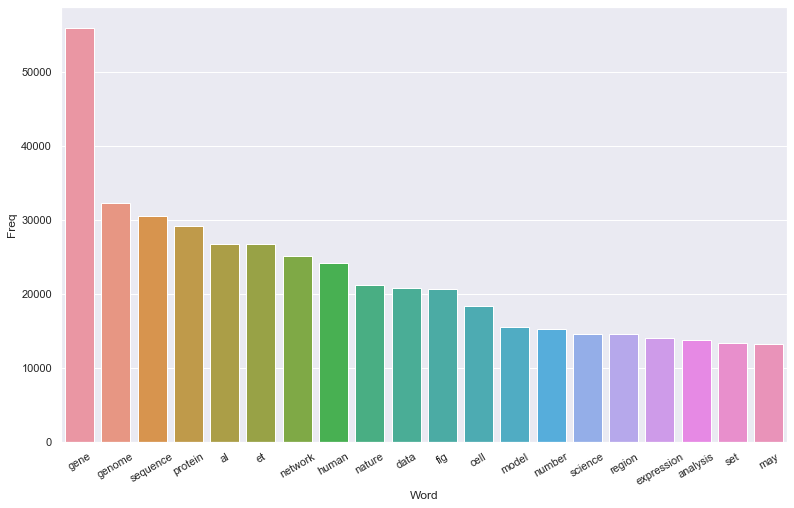

In [84]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                      Bi-gram   Freq
0                       et al  26565
1              sciencemag org   6130
2                human genome   5632
3             gene expression   5146
4        transcription factor   4241
5                    data set   4029
6                    acad sci   3551
7                   natl acad   3434
8                   proc natl   3420
9                  nature vol   3236
10          nature publishing   3165
11           publishing group   3165
12            genome sequence   2982
13  supplementary information   2946
14                 nature com   2788
15                    org cgi   2746
16                  genome re   2650
17               nucleic acid   2572
18                    org may   2544
19                    sci usa   2435


[Text(0, 0, 'et al'),
 Text(0, 0, 'sciencemag org'),
 Text(0, 0, 'human genome'),
 Text(0, 0, 'gene expression'),
 Text(0, 0, 'transcription factor'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'acad sci'),
 Text(0, 0, 'natl acad'),
 Text(0, 0, 'proc natl'),
 Text(0, 0, 'nature vol'),
 Text(0, 0, 'nature publishing'),
 Text(0, 0, 'publishing group'),
 Text(0, 0, 'genome sequence'),
 Text(0, 0, 'supplementary information'),
 Text(0, 0, 'nature com'),
 Text(0, 0, 'org cgi'),
 Text(0, 0, 'genome re'),
 Text(0, 0, 'nucleic acid'),
 Text(0, 0, 'org may'),
 Text(0, 0, 'sci usa')]

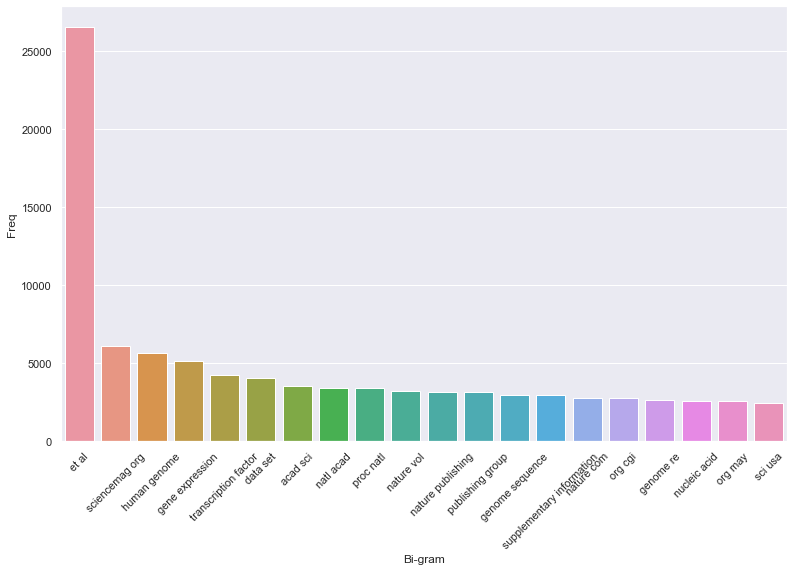

In [85]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                             Tri-gram  Freq
0                       natl acad sci  3434
1                      proc natl acad  3420
2             nature publishing group  3165
3                        acad sci usa  2435
4                  sciencemag org cgi  2157
5                    cgi content full  2038
6                     nucleic acid re  2034
7                     org cgi content  2024
8                  sciencemag org may  1830
9           downloaded sciencemag org  1826
10              draft genome sequence  1704
11                  nature com nature  1496
12      see supplementary information  1298
13        protein protein interaction  1196
14                protein coding gene  1174
15                      et al science  1085
16  supplementary information section  1062
17                 cold spring harbor  1045
18             macmillan magazine ltd   915
19           spring harbor laboratory   911


[Text(0, 0, 'natl acad sci'),
 Text(0, 0, 'proc natl acad'),
 Text(0, 0, 'nature publishing group'),
 Text(0, 0, 'acad sci usa'),
 Text(0, 0, 'sciencemag org cgi'),
 Text(0, 0, 'cgi content full'),
 Text(0, 0, 'nucleic acid re'),
 Text(0, 0, 'org cgi content'),
 Text(0, 0, 'sciencemag org may'),
 Text(0, 0, 'downloaded sciencemag org'),
 Text(0, 0, 'draft genome sequence'),
 Text(0, 0, 'nature com nature'),
 Text(0, 0, 'see supplementary information'),
 Text(0, 0, 'protein protein interaction'),
 Text(0, 0, 'protein coding gene'),
 Text(0, 0, 'et al science'),
 Text(0, 0, 'supplementary information section'),
 Text(0, 0, 'cold spring harbor'),
 Text(0, 0, 'macmillan magazine ltd'),
 Text(0, 0, 'spring harbor laboratory')]

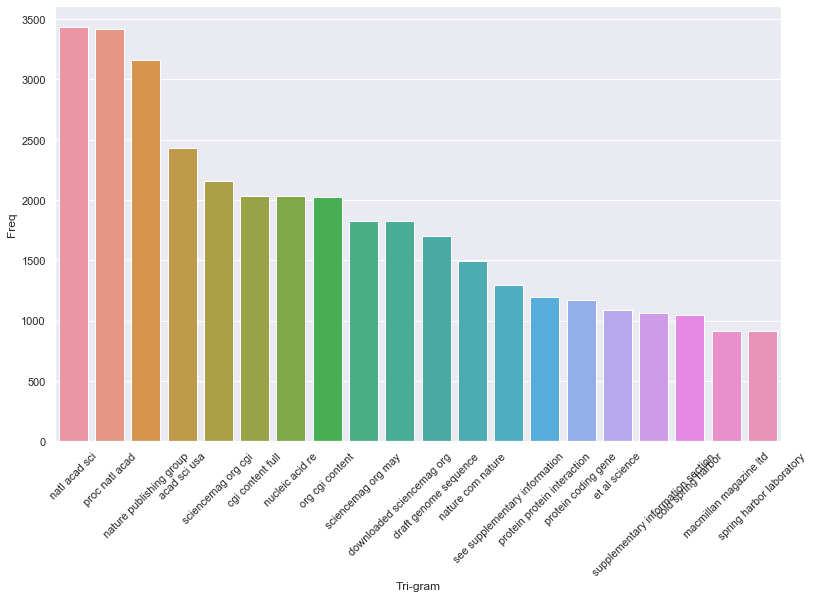

In [86]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()

In [134]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

# function to get accuracy of 1 doc
def getStatistics(pos):
    count = 0
    # fetch document for which keywords needs to be extracted
    doc=corpus[pos]

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 20
    topn = 7
    keywords=extract_topn_from_vector(feature_names,sorted_items,topn)
    
    for w in dataset.loc[pos, 'tags'].split(';'):
        if w in keywords:
            count+=1
    
    return count*100/len(dataset.loc[pos, 'tags'].split(';')), count*100/topn, count*100/len(dataset.loc[pos, 'tags'].split(';'))
    
# total accuracy of all doc
totalAccuracy = 0
totalPrecision = 0
totalRecall = 0

for i in range(len(dataset)):
    a, p, r = (getStatistics(i)[j] for j in range(3))
    totalAccuracy += a
    totalPrecision += p
    totalRecall += r
 
# a, b, c = (getStatistics(0)[i] for i in range(3))
# print(a)
# print(b)
# print(c)
    
# now print the results
# print("\nFile Text:")
# print(doc[0:100])
# print("\nKeywords:")
# for k in keywords:
#     print(k,keywords[k])

In [139]:
a = totalAccuracy/len(dataset)

In [140]:
b = totalPrecision/len(dataset)

In [141]:
f1 = 2*a*b/(a+b)
print(f1)

11.042994032660484


# Try with RaKe (Kaggle)

In [44]:
from rake_nltk import Rake

# Uses stopwords for english from NLTK, and all puntuation characters by default
r = Rake()

def get_keywords_rake(doc, n=20):
    
    # Extraction given the text.
    r.extract_keywords_from_text(doc)
    
    # To get keyword phrases ranked highest to lowest.
    keywords = r.get_ranked_phrases()[0:n]
    
    return keywords

def getAccuracyRaKe(pos):
    count = 0
    # fetch document for which keywords needs to be extracted
    doc=corpus[pos]

    #extract only the top n; n here is 10
    keywords = get_keywords_rake(doc, n=20)
    
    for k in keywords:
        if k in dataset.loc[pos, 'tags'].split(';'):
            count+=1
    
    return count*100/len(dataset.loc[pos, 'tags'].split(';'))

def print_results_RaKe(pos):
    # now print the results
    print("\n=====Title=====")
    print(df['title'][idx])
    print("\n=====Abstract=====")
    print(df['abstract'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k)

In [45]:
get_keywords_rake(dataset.loc[0, 'fileText'])

['org science vol 295 1 march 2002 1667 downloaded',
 'org science vol 295 1 march 2002 1669 downloaded',
 'org science vol 295 1 march 2002 1665 downloaded',
 '1668 1 march 2002 vol 295 science www',
 '1666 1 march 2002 vol 295 science www',
 'flipping signs typically creates exponentially growing instabilities ),',
 '1664 1 march 2002 vol 295 science www',
 'lift l clav2 must offset total weight w',
 'anderson et al ., nucleic acids res',
 'von dassow et al ., nature 406',
 'regulated lego robot would require extensive reverse engineering',
 'bile ducts causes toxic bile acids',
 'yoo et al ., pacific symposium',
 'imoto et al ., pacific symposium',
 'ideker et al ., pacific symposium',
 'otherwise intact control system could cause wild',
 'drug administration may one day mandate simulation',
 'dickinson et al ., science 288',
 'chu et al ., science 282',
 'burns et al ., science 282']

In [46]:
totalAccuracyRake = 0

for i in range(len(dataset)):
    totalAccuracyRake += getAccuracyRaKe(i)

KeyboardInterrupt: 

# Try with TextRank by Gensim

In [95]:
import gensim

In [148]:
def get_keywords_TextRank(doc, topn):
    keywords=gensim.summarization.keywords(doc,
                                           ratio=None,
                                           words=topn,
                                           split=True,
                                           scores=False,
                                           pos_filter=None,
                                           lemmatize=True,
                                           deacc=True)
    return keywords

def getStatisticsTextRank(pos):
    count = 0
    # fetch document for which keywords needs to be extracted
    doc=corpus[pos]

    #extract only the top n
    topn = 10
    keywords = get_keywords_TextRank(doc, topn)
    
    for w in dataset.loc[pos, 'tags'].split(';'):
        for kw in keywords:
            if kw in w:
                count+=1
#         if w in keywords:
#             count+=1
    
    return count*100/len(dataset.loc[pos, 'tags'].split(';')), count*100/topn, count*100/len(dataset.loc[pos, 'tags'].split(';'))

# def print_results_TextRank(pos):
#     print("\n===Keywords===")
#     for k in get_keywords_TextRank(pos):
#         print(k)

In [149]:
# total accuracy of all doc
totalAccuracy = 0
totalPrecision = 0
totalRecall = 0
maxAccTextRank = 0
minAccTextRank = 0

for i in range(len(dataset)):
    a, p, r = (getStatisticsTextRank(i)[j] for j in range(3))
    if minAccTextRank > a:
        minAccTextRank = a
    if maxAccTextRank < a:
        maxAccTextRank = a
    totalAccuracy += a
    totalPrecision += p
    totalRecall += r

# for i in range(len(dataset)):
#     currentAcc = getAccuracyTextRank(i)
#     if minAccTextRank > currentAcc:
#         minAccTextRank = currentAcc
#     if maxAccTextRank < currentAcc:
#         maxAccTextRank = currentAcc
#     totalAccuracyTextRank += currentAcc

In [151]:
print(totalAccuracy)
print(maxAccTextRank)
print(minAccTextRank)

27515.71862813581
150.0
0


In [152]:
totalAccuracyTextRank/len(dataset)

12.17871624730655

In [153]:
a = totalAccuracy/len(dataset)
b = totalPrecision/len(dataset)
f1 = 2*a*b/(a+b)
print(a)
print(b)
print(f1)

24.52381339406044
9.438502673796792
13.630877106794264


In [108]:
k = get_keywords_TextRank(corpus[0])
print_results_TextRank(0)


===Keywords===


TypeError: decoding to str: need a bytes-like object, int found

In [118]:
dataset.loc[0, 'tags']

'parsimony; 2002; robustness; systems biology; network; emergenc; biology; engineering; systems; design; biological model; modeling; review; networks; cell; control; metabolism; complexity; intro; emergence; regulatory network'

In [119]:
for k in keywords:
    if k in dataset.loc[0, 'tags']:
        print('Y')

Y
